In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df = pd.read_csv('50_Startups.csv')

In [3]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
x_marketing = df.loc[:,"Marketing Spend"]
y_profit = df.loc[:,"Profit"]

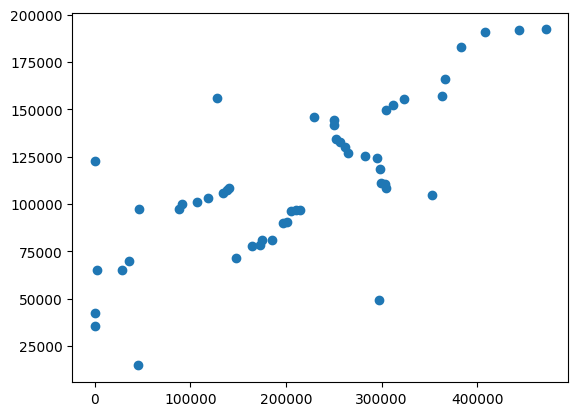

In [5]:
plt.scatter(x_marketing, y_profit)

In [6]:
x_RD = df.loc[:,"R&D Spend"]
y_profit = df.loc[:,"Profit"]

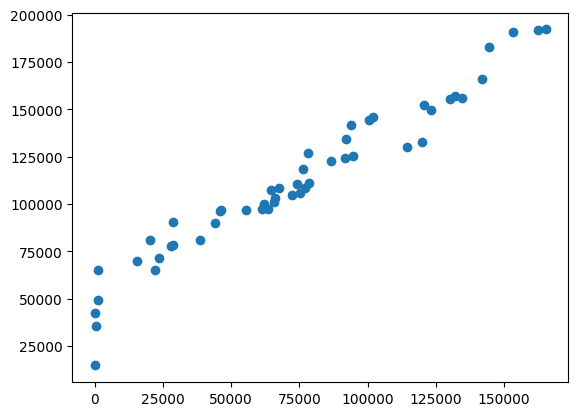

In [7]:
plt.scatter(x_RD, y_profit)

In [8]:
df.describe(include="all")

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [9]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
features_list = ["R&D Spend", "Administration", "Marketing Spend", "State"]
x = df.loc[:,features_list]
y = df.loc[:,"Profit"]


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [12]:
numeric_features = [0,1,2]
numeric_transformer = StandardScaler()

categorical_features = [3]
categorical_transformer = OneHotEncoder()

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

In [13]:
x_train = featureencoder.fit_transform(x_train)

In [14]:
print(x_train[0:5,:])

[[ 0.          1.          0.         -0.35006454 -0.78547109  0.1011968 ]
 [ 0.          0.          1.         -0.55530319 -1.48117426  0.02734979]
 [ 0.          1.          0.          0.07935762  0.80133381 -0.55152132]
 [ 1.          0.          0.         -0.54638238  1.32505817  0.07011684]
 [ 0.          1.          0.          0.43485371 -0.35598663  0.75148516]]


In [15]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [16]:
y_train_pred = regressor.predict(x_train)
print(y_train_pred[:5])

[ 95764.42320496  89164.62849777 109506.72329085  91366.2188941
 127111.48666646]


In [17]:
print(x_test)
x_test = featureencoder.transform(x_test)
print(x_test[:5])

y_test_pred = regressor.predict(x_test)
print(y_test_pred[:5])

    R&D Spend  Administration  Marketing Spend       State
28   66051.52       182645.56        118148.20     Florida
11  100671.96        91790.61        249744.55  California
10  101913.08       110594.11        229160.95     Florida
41   27892.92        84710.77        164470.71     Florida
2   153441.51       101145.55        407934.54     Florida
27   72107.60       127864.55        353183.81    New York
38   20229.59        65947.93        185265.10    New York
31   61136.38       152701.92         88218.23    New York
22   73994.56       122782.75        303319.26     Florida
4   142107.34        91391.77        366168.42     Florida
[[ 0.          1.          0.         -0.1214952   2.2889053  -0.68032287]
 [ 1.          0.          0.          0.6280306  -1.22069499  0.38557774]
 [ 0.          1.          0.          0.65490061 -0.49434195  0.21885524]
 [ 0.          1.          0.         -0.94762148 -1.49417936 -0.30512104]
 [ 0.          1.          0.          1.77048111 -

In [18]:
print("R2 score on training set : ", regressor.score(x_train, y_train))
print("R2 score on test set : ", regressor.score(x_test, y_test))

R2 score on training set :  0.9501847627493607
R2 score on test set :  0.9347068473282425


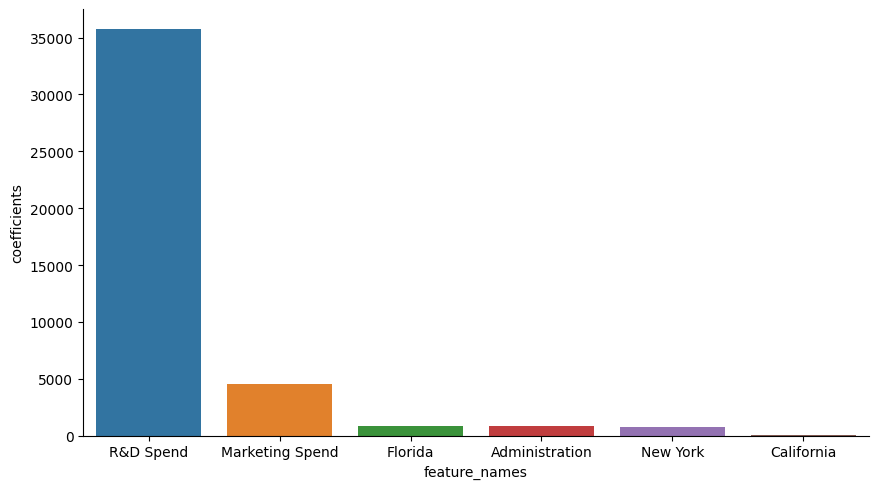

In [23]:
categorical_column_names = featureencoder.transformers_[0][1].categories_

numerical_column_names = x.iloc[:, numeric_features].columns

all_column_names = np.append(categorical_column_names, numerical_column_names)

feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":regressor.coef_
})

feature_importance["coefficients"] = feature_importance["coefficients"].abs()

sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph